<h1><a>Plots</a></h1>

<h2><a id="index">Index</a></h2>

[1. Ratings by Date](#ratingsbyday)

[2. Plotting the data](#plotdata)

[3. Downsampling with Python](#downsample)

[4. Average Ratings by Course by Month](#plt1)

[5. What day of week are people happiest?](#happypeople)

[6. Other type of Plots](#otherplots)

<h2><a id="ratingsbyday">1. Ratings by Date</a></h2>

[Index](#index)

In [1]:
import pandas as pd
from datetime import datetime
from pytz import utc
df = pd.read_csv(".//Data//reviews.csv", parse_dates=["Timestamp"])
df.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [2]:
df['Day'] = df["Timestamp"].dt.date
day_average = pd.DataFrame(df.groupby(["Day"])["Rating"].mean())
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


<h2><a id="plotdata">2. Plotting the data</a></h2>

[Index](#index)

In [3]:
import matplotlib.pyplot as plt

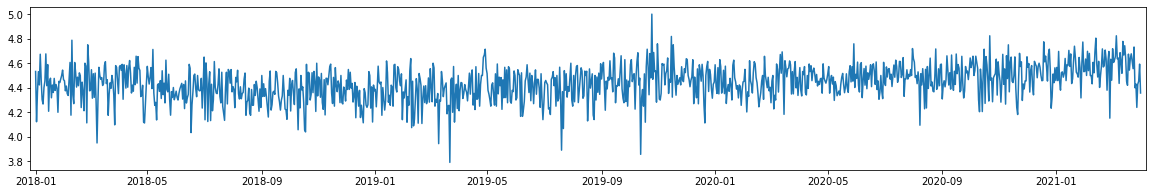

In [4]:
plt.figure(figsize=(20,3))
plt.plot(day_average.index, day_average["Rating"])
plt.margins(x=0.005)

<h2><a id="downsample">3. Downsampling with Python</a></h2>

[Index](#index)

In [5]:
df['Week'] = df['Timestamp'].dt.strftime('%Y-%U')
week_average = pd.DataFrame(df.groupby(['Week'])["Rating"].mean())
week_average.head()

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085


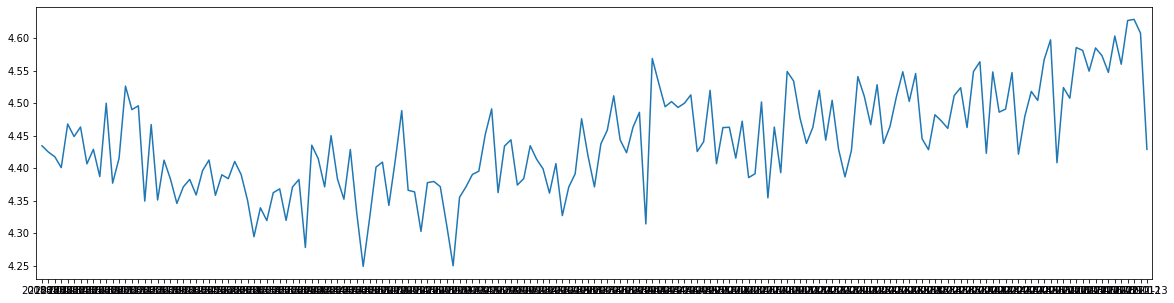

In [6]:
plt.figure(figsize=(20,5))
plt.plot(week_average.index, week_average["Rating"])
plt.margins(x=0.005)

In [7]:
df['Month'] = df['Timestamp'].dt.strftime('%Y-%m')
month_average = pd.DataFrame(df.groupby(['Month'])["Rating"].mean())
month_average.head()

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420


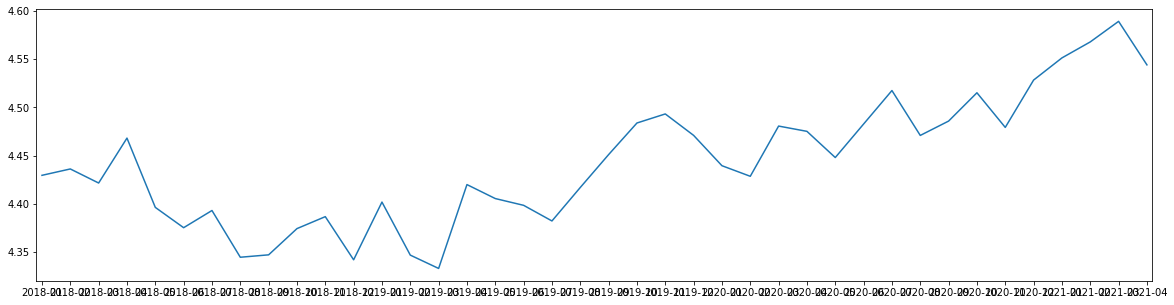

In [8]:
plt.figure(figsize=(20,5))
plt.plot(month_average.index, month_average["Rating"])
plt.margins(x=0.005)

<h2><a id="plt1">4. Average Ratings by Course by Month</a></h2>

[Index](#index)

In [9]:
df['Month'] = df['Timestamp'].dt.strftime('%Y-%m')
df_month_course = pd.DataFrame(df.groupby(["Month", "Course Name"])["Rating"].mean()).unstack()
df_month_course.head()

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          

                                         \
Course Name Data Processing with Python   
Month                                     
2018-01                        4.500000   
2018-02                        4.205882   
2018-03                        4.281250   
2018-04                        4.468750   
2018-05                        4.176471   

                                                                  \
Course Name Interactive Data Visualization with Python and Bokeh   
Month                                                              
2018-01                                               4.285714     
2018-02                                               4.157895     
2018-03                                               4.266667     
2018-04                                               4.428571     
2018-05                                               4.107143     

                                                                      \
Course Name Learn GIS in One Hour Python for Beginners with Examples   
Month                                                                  
2018-01                  4.236842                           4.355422   
2018-02                  4.437500                           4.363095   
2018-03                  4.166667                           4.357143   
2018-04                  4.250000                           4.378947   
2018-05                  4.666667                           4.362654   

                                                                        \
Course Name The Complete Python Course: Build 10 Professional OOP Apps   
Month                                                                    
2018-01                                                    NaN           
2018-02                                                    NaN           
2018-03                                                    NaN           
2018-04                                                    NaN           
2018-05                                                    NaN           

                                                                      
Course Name The Python Mega Course: Build 10 Real World Applications  
Month                                                                 
2018-01                                               4.457368        
2018-02                                               4.481070        
2018-03                                               4.447037        
2018-04                                               4.507412        
2018-05                                               4.422085

<AxesSubplot:xlabel='Month'>

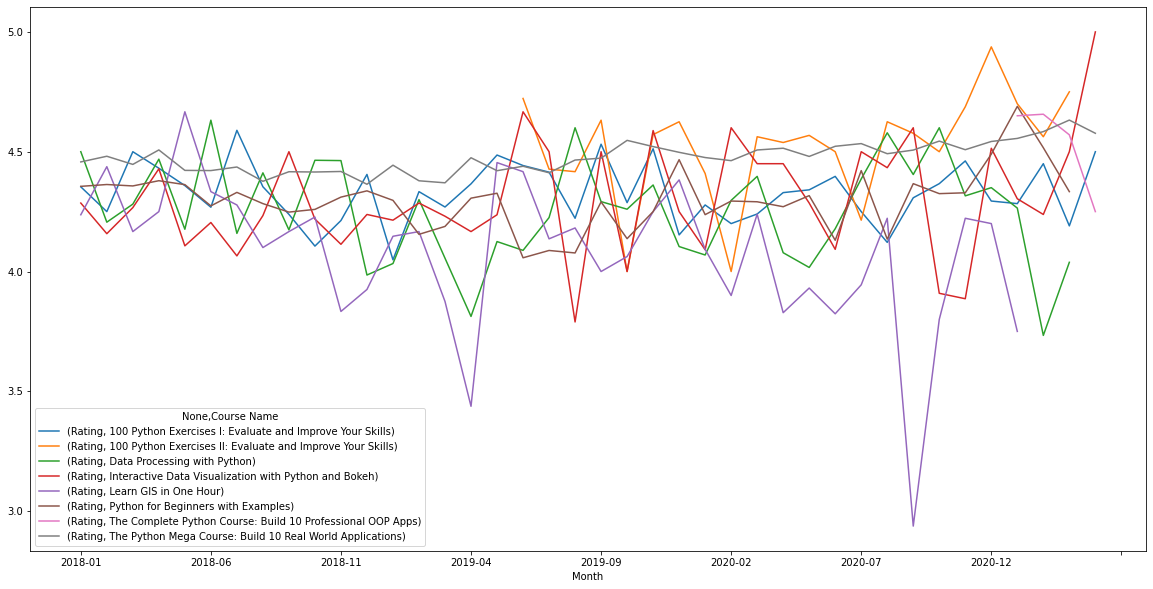

In [10]:
df_month_course.plot(figsize=(20, 10))

<h2><a id="happypeople">5. What day of week are people happiest?</a></h2>

[Index](#index)

In [11]:
df['Weekday'] = df['Timestamp'].dt.strftime('%A')
df['Daynumber'] = df['Timestamp'].dt.strftime('%w').astype(int)
df.head()

,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Weekday,Daynumber
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04,Friday,5


In [12]:
weekday_average = pd.DataFrame(df.groupby(['Weekday']).mean())
weekday_average = weekday_average.sort_values(by='Daynumber')
weekday_average.head()

,Rating,Daynumber
Weekday,,
Sunday,4.439097,0.0
Monday,4.449335,1.0
Tuesday,4.446240,2.0
Wednesday,4.427452,3.0
Thursday,4.437880,4.0


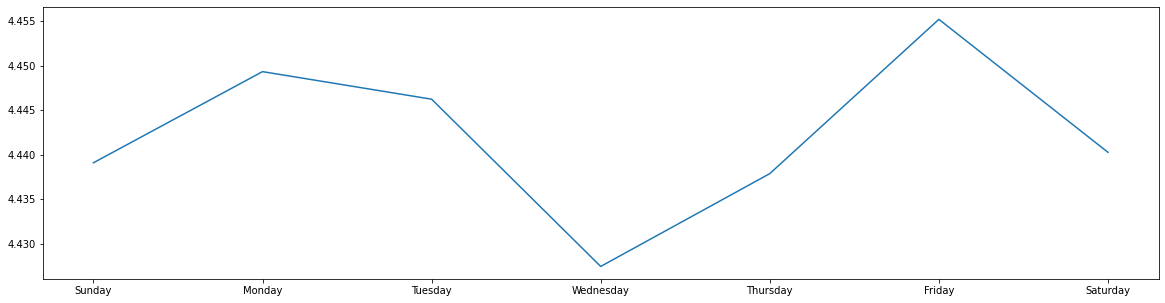

In [13]:
plt.figure(figsize=(20, 5))
plt.plot(weekday_average.index, weekday_average['Rating'])
plt.show()

<h2><a id="otherplots">6. Other type of Plots</a></h2>

[Index](#index)

In [14]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_doc

In [15]:
share = df.groupby(['Course Name']).count()
share.head()

,Timestamp,Rating,Comment,Day,Week,Month,Weekday,Daynumber
Course Name,,,,,,,,
100 Python Exercises I: Evaluate and Improve Your Skills,1593,1593,231,1593,1593,1593,1593,1593
100 Python Exercises II: Evaluate and Improve Your Skills,280,280,81,280,280,280,280,280
Data Processing with Python,868,868,117,868,868,868,868,868
Interactive Data Visualization with Python and Bokeh,767,767,118,767,767,767,767,767
Learn GIS in One Hour,499,499,119,499,499,499,499,499


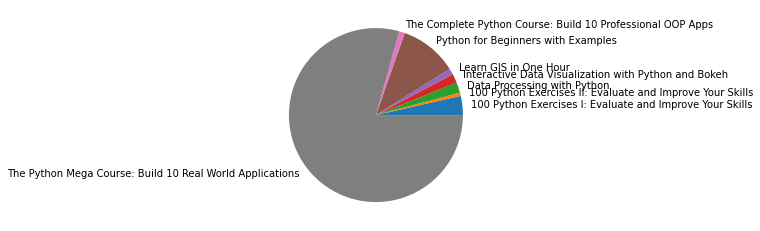

In [16]:
plt.pie(share['Rating'], labels=share.index)
plt.show()